In [1]:
import pandas as pd
import numpy as np
import math as m
#from datetime import datetime
from datetime import date, datetime, timedelta
import csv
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [4]:
import scipy

In [96]:
df=pd.read_csv('results_hum_mati.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_29992\2255767037.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('results_hum_mati.csv')


In [97]:
df

,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
0,2011-01-01 00:00:00,NaN,NaN,NaN,160.554628,0.000000,1.000000,NaN
1,2011-01-01 00:10:00,NaN,NaN,NaN,160.371428,0.166667,1.006944,NaN
2,2011-01-01 00:20:00,NaN,NaN,NaN,159.973113,0.333333,1.013889,NaN
3,2011-01-01 00:30:00,NaN,NaN,NaN,159.372358,0.500000,1.020833,NaN
4,2011-01-01 00:40:00,NaN,NaN,NaN,158.586522,0.666667,1.027778,NaN
...,...,...,...,...,...,...,...,...
622355,2022-12-12 23:10:00,0.0,NaN,NaN,159.141635,23.166667,346.965278,NaN
622356,2022-12-12 23:20:00,0.0,NaN,NaN,159.824243,23.333333,346.972222,NaN
622357,2022-12-12 23:30:00,0.0,NaN,NaN,160.310736,23.500000,346.979167,NaN
622358,2022-12-12 23:40:00,0.0,NaN,NaN,160.586078,23.666667,346.986111,NaN


In [29]:
print(df['kt_10min'][60:80])

60    0.352049
61    0.411869
62    0.412298
63    0.408060
64    0.434975
65    0.561602
66    0.657100
67    0.670245
68    0.545297
69    0.418265
70    0.721017
71    0.686803
72         NaN
73         NaN
74         NaN
75         NaN
76         NaN
77         NaN
78         NaN
79         NaN
Name: kt_10min, dtype: float64


In [35]:
kt = df['kt_10min']

0.5999153099575463
0.705888594245446


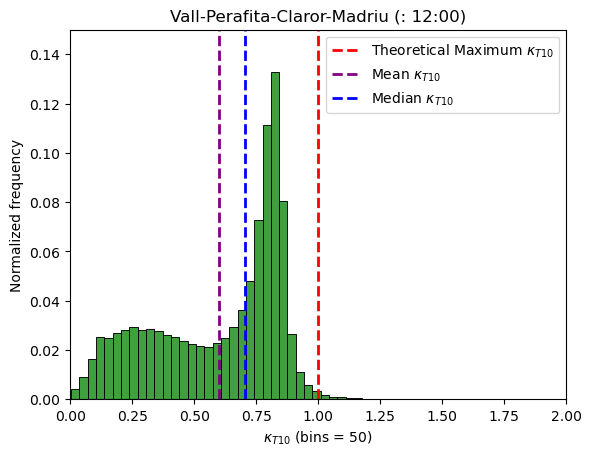

In [37]:
sns.histplot(data= kt, stat = 'probability',bins =50,color = 'green') # fer això amb un kt diari

# PROVAR DE FER ELS BINS DINTRE DE RANG DETERMINAT [0,2]

plt.vlines(x=1, ymin = 0,ymax= 0.15, colors='red', ls='--', lw=2, label=r'Theoretical Maximum $\kappa_{T10}$')
plt.vlines(x=kt.mean(),ymin = 0,ymax= 0.15, colors='purple', ls='--', lw=2, label=r'Mean $\kappa_{T10}$')
plt.vlines(x=kt.median(),ymin = 0,ymax= 0.15, colors='blue', ls='--', lw=2, label=r'Median $\kappa_{T10}$')

plt.ylim(0,0.15)
plt.xlim(0,2)
plt.legend(loc=1)

plt.ylabel('Normalized frequency')
plt.xlabel(r'$\kappa_{T10}$ (bins = 50)')
plt.title('Vall-Perafita-Claror-Madriu (: 12:00)')
#plt.savefig('kt10_hist_sns_median_morning')
print(kt.mean())
print(kt.median())

In [98]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

<function matplotlib.pyplot.show(close=None, block=None)>

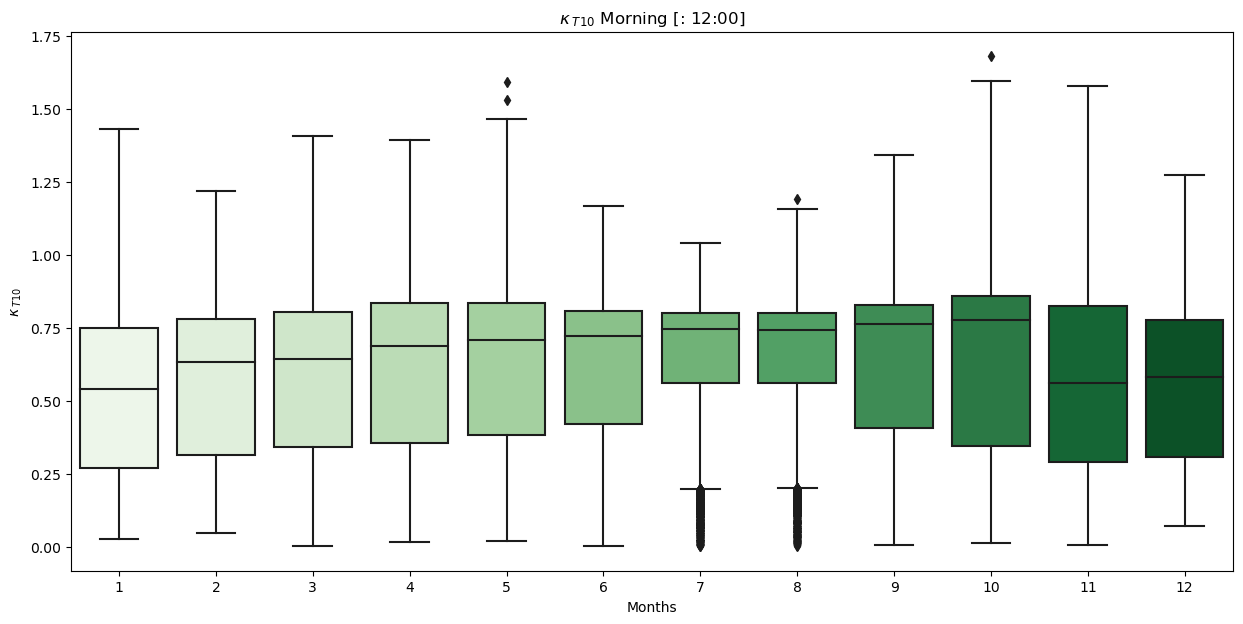

In [140]:
# get month names; optional step for renaming the xticklabels
#months = list(months)[1:]

# now just plot the dateframe with seaborn
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(x=df.TIMESTAMP.dt.month, y=df.kt_10min,palette ='Greens')#, hue=df.TIMESTAMP.dt.year, ax=ax)
#ax.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
ax.set(xlabel='Month', xticklabels=range(1,13))  # setting the xticklabels is optional


plt.ylabel(r'$\kappa_{\;T10}$')
plt.xlabel('Months')
plt.title(r'$\kappa_{\;T10}$ Morning [: 12:00]')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

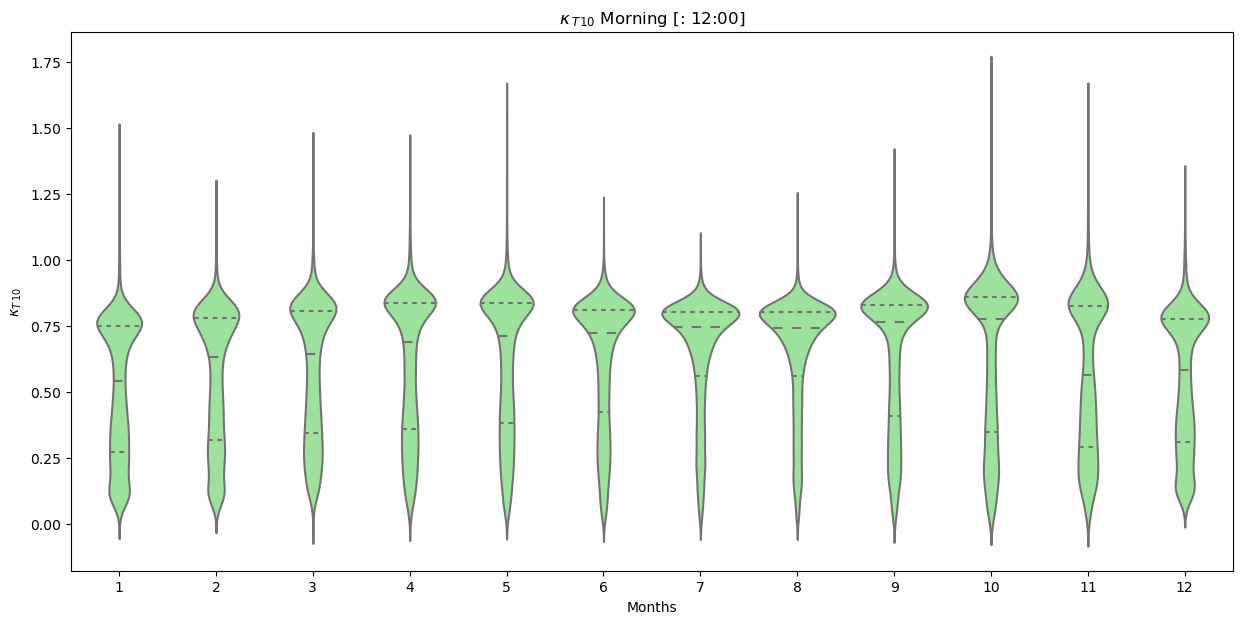

In [148]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.violinplot(x=df.TIMESTAMP.dt.month, y=df.kt_10min,color = 'lightgreen',inner='quartile')# color ='forestgreen')#, hue=df.TIMESTAMP.dt.year, ax=ax)
#ax.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
ax.set(xlabel='Month', xticklabels=range(1,13))  # setting the xticklabels is optional

#plt.ylim(0,1.75)
plt.ylabel(r'$\kappa_{T\;10}$')
plt.xlabel('Months')
plt.title(r'$\kappa_{\;T10}$ Morning [: 12:00]')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

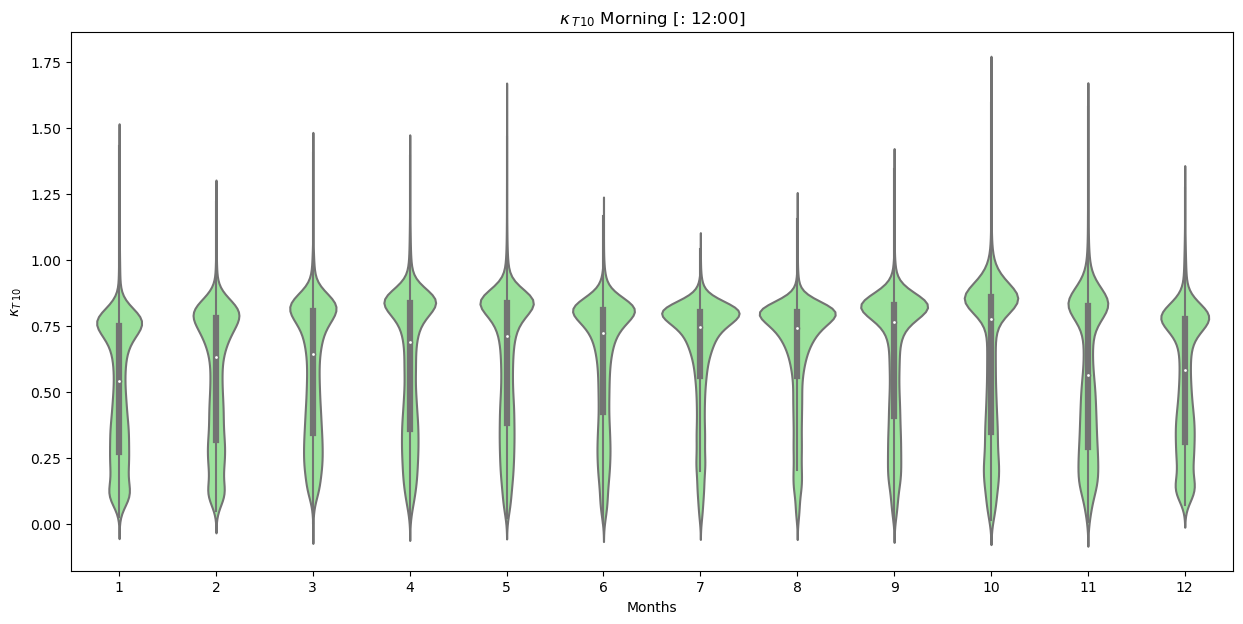

In [149]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.violinplot(x=df.TIMESTAMP.dt.month, y=df.kt_10min,color = 'lightgreen',inner='box')# color ='forestgreen')#, hue=df.TIMESTAMP.dt.year, ax=ax)
#ax.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
ax.set(xlabel='Month', xticklabels=range(1,13))  # setting the xticklabels is optional

#plt.ylim(0,1.75)
plt.ylabel(r'$\kappa_{T\;10}$')
plt.xlabel('Months')
plt.title(r'$\kappa_{\;T10}$ Morning [: 12:00]')
plt.show

In [77]:

#n = len(df['kt_10min'])
ts = pd.DataFrame(df, columns = ['kt_10min'],index = ['TIMESTAMP'].dt.strftime('%Y-%M-%D HH:MM:SS'))
#ts.boxplot(by = "month",column =['kt_10min'])
#ts.groupby(lambda x: x.strftime("%m")).boxplot(subplots=False, figsize=(12,9), rot=90,notch = True)
#ts.groupby(lambda x: x.strftime("%m")).boxplot(subplots=False, figsize=(12,9), rot=90,notch = True)
ts.boxplot(by='month')

#plt.ylabel(r'$\kappa_{T\;10}$')
#plt.xlabel('Months')
#plt.title('Monthly Solar Irradiance boxplot at Vall Perafita-Claror-Madriu')
#plt.grid(visible=None)

AttributeError: 'list' object has no attribute 'dt'

In [ ]:
pd.to_datetime(pd.Series(['1918-11-11'])).dt.strftime('%b-%Y')

In [ ]:
gb = df.groupby(['Import Terminal', 'Arrival Date'])['Value'].sum().reset_index()
gb['month'] = gb['Arrival Date'].apply(lambda x: int(x.split('/')[0]))
for terminal, group in gb.groupby('Import Terminal'):
    group.boxplot(by='month', column='Value')
    plt.suptitle('Import terminal {}'.format(terminal))
    plt.title('')

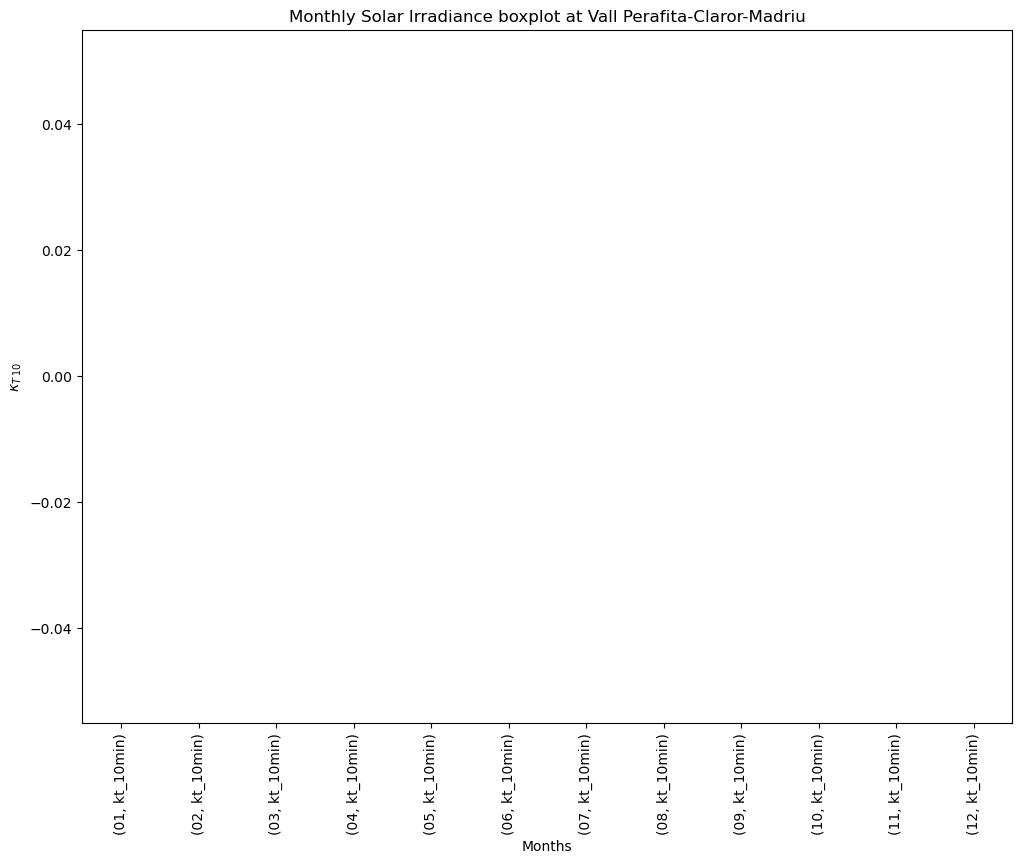

In [39]:
n = len(kt)
ts = pd.DataFrame(kt[:n], index=pd.date_range(start="2011-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%m")).boxplot(subplots=False, figsize=(12,9), rot=90,notch = True)  #PER ANYS


#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)                PER DIES
plt.ylabel(r'$\kappa_{T\;10}$')
plt.xlabel('Months')
plt.title('Monthly Solar Irradiance boxplot at Vall Perafita-Claror-Madriu')
plt.grid(visible=None)

In [116]:
data = csv.reader(open('results_hum_mati.csv', 'r'), delimiter=",")#, quotechar='|')
column3, column7 =[],[]

for row in data:
    column3.extend([row[2]])
    column7.extend([row[7]])

In [117]:
col3,col7 = column3,column7
del col3[:1],col7[:1]

In [118]:
col3 =np.array(col3)
col3[col3 == ''] =np.nan
col3 = col3.astype(float)

col7 =np.array(col7)
col7[col7 == ''] =np.nan
col7 = col7.astype(float)

In [119]:
mask = ~(np.isnan(col3) | np.isnan(col7))

In [120]:
x = col3[mask]
print(x)

[66.91 67.14 67.6  ... 65.65 66.76 67.59]


In [121]:
y=col7[mask]
print(y)

[0.36419012 0.44989837 0.45128784 ... 0.67205427 0.43781937 0.31771297]


In [122]:
from scipy import stats

In [123]:
res = stats.linregress(x, y)
print(res.rvalue)
print(f"R-squared: {res.rvalue**2:.6f}")

-0.491742518671163
R-squared: 0.241811


Weak correlation


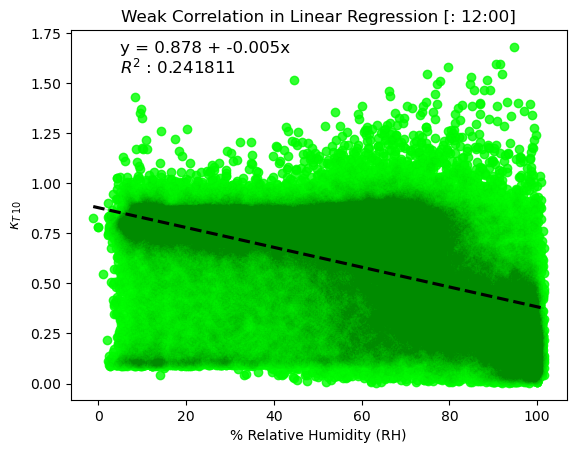

In [134]:


p=sns.regplot(x=x,y=y,scatter_kws={"color": "lime"}, line_kws={"color": "black"})

p.lines[0].set_linestyle("--")

plt.scatter(x=x,y=y,color ='forestgreen',alpha =0.005)

plt.xlabel('% Relative Humidity (RH)')
plt.ylabel(r'$\kappa_{T\;10}$')
plt.title('Weak Correlation in Linear Regression [: 12:00]')

#---------------------------------------------------------------------------------------------

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())



#add regression equation to plot
plt.text(5, 1.65, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x',color = 'black',fontsize=12)
plt.text(5,1.55,fr'$R^{2}$ : {0.241811}',color ='black',fontsize=12)


#---------------------------------------------------------------------------------------------

plt.savefig('kt_vs_humrel_green_mati')
print('Weak correlation')